In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# About the Data
* <b>PassengerId</b> - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

<b>If >= _____02 It means it is a group</b>
* <b>HomePlanet</b> - The planet the passenger departed from, typically their planet of permanent residence.
* <b>CryoSleep</b> - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* <b>Cabin</b> - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

<b> Cabin is split into deck/num/side </b>
* <b>Destination</b> - The planet the passenger will be debarking to.
* <b>Age</b> - The age of the passenger.
* <b>VIP</b> - Whether the passenger has paid for special VIP service during the voyage.
* <b>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</b> - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* <b>Name</b> - The first and last names of the passenger.
* <b>Transported</b> - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

<hr>

<b>test.csv</b> - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
<br>
<b>sample_submission.csv</b> - A submission file in the correct format.
<b>PassengerId</b> - Id for each passenger in the test set.
<b>Transported</b> - The target. For each passenger, predict either True or False.
<br>


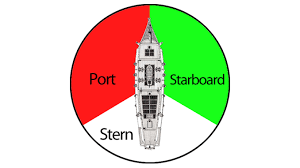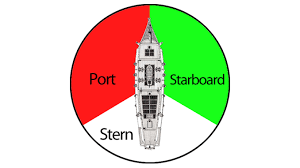

<hr>
<h1> Predict the Transported Column </h1>
<hr>

# Import The Libraries

In [2]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

# Loading the Data

In [3]:
data= pd.read_csv("../input/spaceship-titanic/train.csv")
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Information from the data.info()
### 1. Fill in missing values in the columns of the dataset
### 2. Balance the Dataset
### 3. Drop the high cardinality columns
* PassengerId has a high cardinality: 8693 distinct values	High cardinality
* Cabin has a high cardinality: 6560 distinct values	High cardinality (But consider exploring this column)
* Name has a high cardinality: 8473 distinct values



#### Use pandas_profiling for EDA

In [5]:
#profile= ProfileReport(data, title="EDA")
#profile.to_notebook_iframe()

In [6]:
def split_cabin(x):
    if(len(str(x).split("/"))<3):
        return ["Missing", "Missing" , "Missing"]
    else:
        return str(x).split('/')


In [7]:
# data['cabintemp']= data['Cabin'].apply(lambda x: split_cabin(x))
# data["Deck"]=data["cabintemp"].apply(lambda x: x[0])
# data["Side"]=data["cabintemp"].apply(lambda x: x[2])
# data.drop(columns=["cabintemp"],axis=1, inplace=True)

In [8]:
#data["Age"].fillna(data["Age"].mean(), inplace= True)

In [9]:
data['CryoSleep']

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689     True
8690    False
8691    False
8692    False
Name: CryoSleep, Length: 8693, dtype: object

In [10]:
## Creating a preprocessing function to transform the Dataset
def preprocessing(data):
    # fill missing values in the homeplanet column with missing
    data['HomePlanet'].fillna("Missing", inplace=True)
    # Cryosleep - highly correlated , so drop the rows with nans  or replace with "Missing"
    data['CryoSleep'].fillna("Missing", inplace =True)
    # Split the Cabin column and make new columns "Deck" and "Side"
    data['cabintemp']= data['Cabin'].apply(lambda x: split_cabin(x))
    data["Deck"]=data["cabintemp"].apply(lambda x: x[0])
    data["Side"]=data["cabintemp"].apply(lambda x: x[2])
    data.drop(columns=["cabintemp","Cabin"],axis=1, inplace=True)
    # Destination
    data["Destination"].fillna("Missing", inplace =True)
    #Age
    data["Age"].fillna(data["Age"].mean(), inplace= True)
    #VIP - drop nan rows
    data['VIP'].fillna("Missing", inplace =True)
    # Room Service, FoodCourt, ShoppingMall, Spa, VRDeck
    data["RoomService"].fillna(0, inplace=True)
    data["FoodCourt"].fillna(0, inplace=True)
    data["ShoppingMall"].fillna(0, inplace=True)
    data["Spa"].fillna(0, inplace=True)
    data["VRDeck"].fillna(0, inplace=True)
    # Name - drop the name column due to high cardinality
    data.drop(columns=['Name'], inplace =True)


In [11]:
df= data.copy()
preprocessing(df)

In [12]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'Deck', 'Side'],
      dtype='object')

In [13]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   object 
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Deck          8693 non-null   object 
 13  Side          8693 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## Start Modelling
* Feature and Target Values ( X and Y)
* One hot encode categorical features
* Train on different algorithms

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [15]:
# Creating feature columns
# Drop not required columns
X= df.drop(columns =["Transported", "PassengerId"], axis=1)
# One hot encode 
X=pd.get_dummies(X)
# Creating target columns
Y= df["Transported"]

In [16]:
X_train, X_test, Y_train , Y_test= train_test_split(X, Y, test_size=0.3, random_state=41)

In [17]:
X_train.shape

(6085, 32)

In [18]:
pipelines={
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier(random_state=41)),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=41)) 
}

### Parameters for a RandomForest Classifier

In [19]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [20]:
grid= {
    'rf':{
        'randomforestclassifier__n_estimators':[100,200,300]
    },
    
    'gb':{
        'gradientboostingclassifier__n_estimators':[100,200,300]
    }
}

In [21]:
# create a blank dictionary to hold the models
fit_models={}
# Loop through the algorithms
for algo, pipeline in pipelines.items():
    print(f"Training the {algo} model.")
    # Create new Grid Search CV classes
    model= GridSearchCV(pipeline, grid[algo],n_jobs=-1, verbose=3)
    # Train the model
    model.fit(X_train, Y_train)
    #Store the results in the dictionary
    fit_models[algo]= model

Training the rf model.
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Training the gb model.
Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [22]:
fit_models

{'rf': GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                        ('randomforestclassifier',
                                         RandomForestClassifier(random_state=41))]),
              n_jobs=-1,
              param_grid={'randomforestclassifier__n_estimators': [100, 200,
                                                                   300]},
              verbose=3),
 'gb': GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                        ('gradientboostingclassifier',
                                         GradientBoostingClassifier(random_state=41))]),
              n_jobs=-1,
              param_grid={'gradientboostingclassifier__n_estimators': [100, 200,
                                                                       300]},
              verbose=3)}

### Evaluate model for test partition

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [24]:
# Evaluate the performance of the model
for algo , model in fit_models.items():
    Y_pred= model.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred)
    precision= precision_score(Y_test,Y_pred)
    recall =recall_score(Y_test,Y_pred)
    print(f"Metrics for {algo} : Accuracy: {accuracy} , recall: {recall}, precision: {precision}")

Metrics for rf : Accuracy: 0.7845092024539877 , recall: 0.7483394833948339, precision: 0.8210526315789474
Metrics for gb : Accuracy: 0.7879601226993865 , recall: 0.814760147601476, precision: 0.7852062588904695


## Save best model

In [25]:
import pickle

In [26]:
with open('gradientbooted.pkl','wb') as f: # wb - write binary
    pickle.dump(fit_models['gb'], f)

In [27]:
with open('gradientbooted.pkl','rb') as f: # rb - read binary
    reloaded_model= pickle.load(f)


In [28]:
reloaded_model

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=41))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__n_estimators': [100, 200,
                                                                      300]},
             verbose=3)

## Predict on test data

In [29]:
test_data=pd.read_csv("../input/spaceship-titanic/test.csv")

In [30]:
test_data.shape

(4277, 13)

In [31]:
df_test= test_data.copy()
preprocessing(df_test)
df_test= pd.get_dummies(df_test.drop("PassengerId", axis=1))

In [32]:
df_test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Missing,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Missing,Deck_T,Side_Missing,Side_P,Side_S
0,27.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,19.0,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,38.0,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,20.0,10.0,0.0,635.0,0.0,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [33]:
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Missing,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Missing,Deck_T,Side_Missing,Side_P,Side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [34]:
y_pred_test=fit_models['gb'].predict(df_test)

In [35]:
submission= pd.DataFrame([test_data['PassengerId'], y_pred_test]).T


In [36]:
submission

,PassengerId,Unnamed 0
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


## Change the columns accordingly

In [37]:
submission.columns= ["PassengerId", "Transported"]

In [38]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [39]:
submission.to_csv("submission.csv")

# If you find this notebook helpful , UPVOTE 